# Determine initial locations to start particle tracks

In [1]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
from mpl_toolkits.basemap import Basemap, cm
from matplotlib.patches import ConnectionPatch
import cmocean
import datetime
import sys
sys.path.insert(0, '/ocean/brogalla/GEOTRACES/analysis-brogalla/modules')
import ariane as ar
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

Load general model parameters:

In [2]:
mask  = nc.Dataset('/ocean/brogalla/GEOTRACES/ariane_runs/ANHA12_Ariane_mesh.nc')
tmask = mask.variables['tmask']

In [3]:
folder = '/data/brogalla/ANHA12/2015/'
gridT  = 'ANHA12-EXH006_y2016m12d16_gridT.nc'
d1     = nc.Dataset(folder+gridT)
lons   = np.array(d1.variables['nav_lon'])
lats   = np.array(d1.variables['nav_lat'])
deptht = np.array(d1.variables['deptht'])
temp   = np.array(d1.variables['votemper'])

In [4]:
print(len(transect_lon), len(transect_lat), lons.shape, lats.shape, tmask.shape)

NameError: name 'transect_lon' is not defined

## Lancaster Sound cross-section:

Transect lons and lats:

In [12]:
transect_lon = [-83.87,-83.87,-83.87,-83.87,-83.87,\
                -83.87,-83.87,-83.87,-83.87]
transect_lat = [73.70,73.80,73.90,74.00,74.10, \
                74.20,74.30,74.40,74.50]

Call function to find associated model grid points for release of particles:

In [13]:
transect_i, transect_j, transect_k = ar.find_release_coord(transect_lon, transect_lat, lons, lats, tmask)

i: [1591, 1593, 1595, 1596, 1598, 1600, 1601, 1603, 1605]
j: [493, 496, 498, 501, 503, 506, 508, 511, 514]
k: [30, 32, 33, 33, 33, 33, 33, 33, 27]


In [19]:
transect_lons = [lons[transect_i[n],transect_j[n]] for n in range(0,len(transect_i))]
transect_lats = [lats[transect_i[n],transect_j[n]] for n in range(0,len(transect_i))]

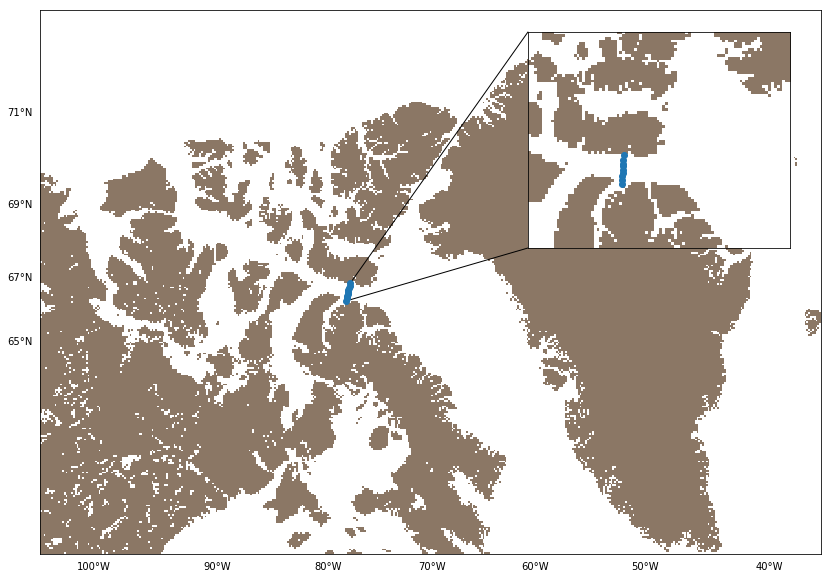

In [86]:
fig, ax1 = plt.subplots(figsize=(14,10))
left, bottom, width, height = [0.589, 0.55, 0.3, 0.3]
ax2 = fig.add_axes([left, bottom, width, height])

# plot 1 ---------------------------
proj1=Basemap(projection='eqdc',lat_0 = 75, lon_0 = -70, resolution='i', width=3.95e6, height=2.75e6, ax=ax1)
proj1.drawparallels(np.arange(int(65),int(90),2),labels=[1,0,0,0], linewidth=0.0)
proj1.drawmeridians(np.arange(int(-140),int(-30),10),labels=[0,0,0,1], linewidth=0.0)
proj1.drawlsmask(land_color = "#8b7765", ocean_color="none", resolution = 'h', zorder=1)

part_i, part_j = proj1(transect_lons, transect_lats)
proj1.scatter(part_i, part_j, zorder=3)

# plot 2 ---------------------------
proj2=Basemap(projection='eqdc',lat_0 = 75, lon_0 = -80, resolution='i', width=0.85e6, height=0.70e6, ax=ax2)
proj2.drawlsmask(land_color = "#8b7765", ocean_color="none", resolution = 'h', zorder=1)

part2_i, part2_j = proj2(transect_lons, transect_lats)
proj2.scatter(part2_i, part2_j, zorder=3)

# draw line to subset zoom bottom --
xy1     = (part_i[0], part_j[0])
xy2     = (proj2.xmin, proj2.ymin)
con_bot = ConnectionPatch(xyA=xy1, xyB=xy2, axesA=ax1, axesB=ax2, \
                      coordsA="data", coordsB="data", arrowstyle="-", linewidth=1, zorder=2)
ax1.add_artist(con_bot)

# draw line to subset zoom top -----
xy1     = (part_i[-1], part_j[-1])
xy2     = (proj2.xmin, proj2.ymax)
con_top = ConnectionPatch(xyA=xy1, xyB=xy2, axesA=ax1, axesB=ax2, \
                      coordsA="data", coordsB="data", arrowstyle="-", linewidth=1, zorder=2)
ax1.add_artist(con_top)

## Barrow Strait cross-section:

In [79]:
bs_lon = [-97.8,-97.8,-97.8,-97.8, \
          -97.8,-97.8,-97.8,-97.8,-97.8]
bs_lat = [74.2,74.3,74.4,74.5, \
          74.6,74.7,74.8,74.9,75.0]

In [80]:
bs_i, bs_j, bs_k = ar.find_release_coord(bs_lon, bs_lat, lons, lats, tmask)

i: [1711, 1712, 1713, 1714, 1715, 1716, 1717, 1718, 1719]
j: [454, 457, 461, 464, 467, 470, 473, 477, 480]
k: [25, 25, 23, 8, 22, 23, 24, 23, 17]


In [81]:
bs_lons = [lons[bs_i[n],bs_j[n]] for n in range(0,len(bs_i))]
bs_lats = [lats[bs_i[n],bs_j[n]] for n in range(0,len(bs_i))]

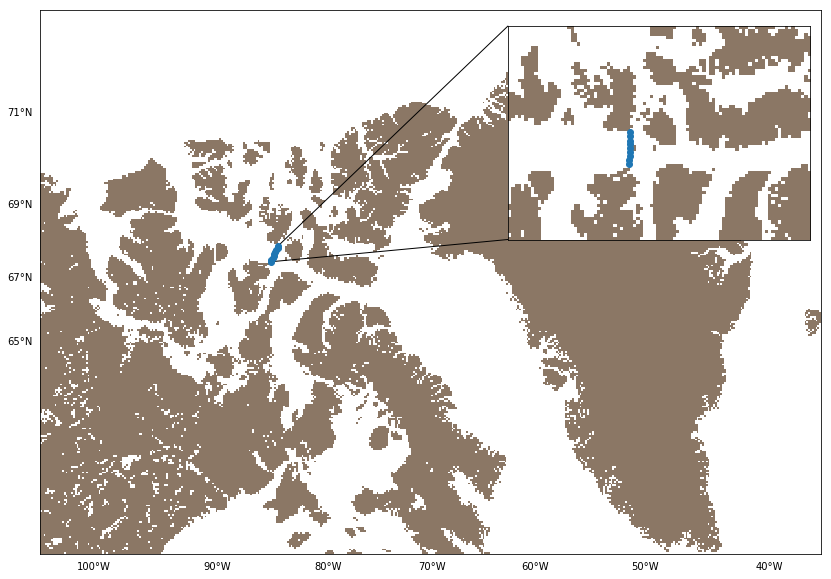

In [88]:
fig, ax1 = plt.subplots(figsize=(14,10))
left, bottom, width, height = [0.589, 0.56, 0.3, 0.3]
ax2 = fig.add_axes([left, bottom, width, height])

# plot 1 ---------------------------
proj1=Basemap(projection='eqdc',lat_0 = 75, lon_0 = -70, resolution='i', width=3.95e6, height=2.75e6, ax=ax1)
proj1.drawparallels(np.arange(int(65),int(90),2),labels=[1,0,0,0], linewidth=0.0)
proj1.drawmeridians(np.arange(int(-140),int(-30),10),labels=[0,0,0,1], linewidth=0.0)
proj1.drawlsmask(land_color = "#8b7765", ocean_color="none", resolution = 'h', zorder=1)

part_i, part_j = proj1(bs_lons, bs_lats)
proj1.scatter(part_i, part_j, zorder=3)

# plot 2 ---------------------------
proj2=Basemap(projection='eqdc',lat_0 = 75, lon_0 = -95, resolution='i', width=0.85e6, height=0.60e6, ax=ax2)
proj2.drawlsmask(land_color = "#8b7765", ocean_color="none", resolution = 'h', zorder=1)

part2_i, part2_j = proj2(bs_lons, bs_lats)
proj2.scatter(part2_i, part2_j, zorder=3)

# draw line to subset zoom bottom --
xy1     = (part_i[0], part_j[0])
xy2     = (proj2.xmin, proj2.ymin)
con_bot = ConnectionPatch(xyA=xy1, xyB=xy2, axesA=ax1, axesB=ax2, \
                      coordsA="data", coordsB="data", arrowstyle="-", linewidth=1, zorder=2)
ax1.add_artist(con_bot)

# draw line to subset zoom top -----
xy1     = (part_i[-1], part_j[-1])
xy2     = (proj2.xmin, proj2.ymax)
con_top = ConnectionPatch(xyA=xy1, xyB=xy2, axesA=ax1, axesB=ax2, \
                      coordsA="data", coordsB="data", arrowstyle="-", linewidth=1, zorder=2)
ax1.add_artist(con_top)